In [2]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
olympic = pd.read_csv(r'C:\Users\ADMIN\Documents\DA-tít\Project\Olympic\athlete_events.csv')
noc = pd.read_csv(r'C:\Users\ADMIN\Documents\DA-tít\Project\Olympic\noc_regions.csv')

In [6]:
noc

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [7]:
olympic

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# Mean H/W WINTER

In [8]:
count_winter = olympic[olympic['Season'] == 'Winter'].Sex.value_counts()

winter_mean_hw = olympic[olympic['Season'] == 'Winter'].groupby(['Sex']).mean()[['Height', 'Weight', 'Age']]

print(f'Mean H/W WINTER: \n {winter_mean_hw}')

print(f'COUNT:\n {count_winter}')

Mean H/W WINTER: 
          Height     Weight        Age
Sex                                  
F    166.528250  59.755156  24.014398
M    178.668699  76.357058  25.504261
COUNT:
 M    33485
F    15079
Name: Sex, dtype: int64


# Mean H/W SUMMER

In [9]:
count_summer = olympic[olympic['Season'] == 'Summer'].Sex.value_counts()

summer_mean_hw = olympic[olympic['Season'] == 'Summer'].groupby(['Sex']).mean()[['Height', 'Weight', 'Age']]

print(f'Mean H/W SUMMER: \n {summer_mean_hw}')

print(f'COUNT:\n {count_summer}')

Mean H/W SUMMER: 
          Height     Weight        Age
Sex                                  
F    168.169025  60.087644  23.660997
M    178.901874  75.604195  26.443944
COUNT:
 M    163109
F     59443
Name: Sex, dtype: int64


# Mean H/W GOLD MEDAL

In [10]:
count_gold_medal = olympic[olympic['Medal'] == 'Gold'].Sex.value_counts()

gold_medal_mean_hw = olympic[olympic['Medal'] == 'Gold'].groupby(['Sex']).mean()[['Height', 'Weight', 'Age']]

print(f'Mean H/W GOLD MEDAL: \n {gold_medal_mean_hw}')

print(f'COUNT:\n {count_gold_medal}')

Mean H/W GOLD MEDAL: 
          Height     Weight        Age
Sex                                  
F    170.693872  63.463486  24.372596
M    181.468568  79.588895  26.504641
COUNT:
 M    9625
F    3747
Name: Sex, dtype: int64


# Mean H/W OLYMPIC

In [11]:
olympic_mean_hw = olympic.groupby(['Sex']).mean()[['Height', 'Weight', 'Age']]

print(f'Mean H/W OLYMPIC: \n {olympic_mean_hw}')

Mean H/W OLYMPIC: 
          Height     Weight        Age
Sex                                  
F    167.839740  60.021252  23.732881
M    178.858463  75.743677  26.277562


# JOIN DATASET

In [51]:
join = olympic.join(noc.set_index('NOC'), on='NOC')[olympic['Medal'] == 'Gold']

#olympic[olympic['Medal'] == 'Gold'].sort_values(by=['Age'], ascending=False).head(10)

join

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270981,135503,Zurab Zviadauri,M,23.0,182.0,90.0,Georgia,GEO,2004 Summer,2004,Summer,Athina,Judo,Judo Men's Middleweight,Gold,Georgia,NaN
271009,135520,Julia Zwehl,F,28.0,167.0,60.0,Germany,GER,2004 Summer,2004,Summer,Athina,Hockey,Hockey Women's Hockey,Gold,Germany,NaN
271016,135523,"Ronald Ferdinand ""Ron"" Zwerver",M,29.0,200.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Volleyball,Volleyball Men's Volleyball,Gold,Netherlands,NaN
271049,135545,Henk Jan Zwolle,M,31.0,197.0,93.0,Netherlands,NED,1996 Summer,1996,Summer,Atlanta,Rowing,Rowing Men's Coxed Eights,Gold,Netherlands,NaN


# Team - Pie Chart (Gold Medal)

([<matplotlib.patches.Wedge at 0x2118a5d0b80>,
 [Text(0.9193625627476768, 0.603963970960209, ''),
  Text(0.17498715028189482, 1.0859924020158804, ''),
  Text(-0.27036366497948033, 1.0662567648830479, ''),
  Text(-0.5594472095506774, 0.9471107747913972, ''),
  Text(-0.7745212122854447, 0.7810997962615823, ''),
  Text(-0.9315144536466908, 0.5850477097188804, ''),
  Text(-1.0340835366581111, 0.37506164721636515, ''),
  Text(-1.0891617910985008, 0.15403438840436323, ''),
  Text(-1.0980110724389087, -0.06611871748270597, ''),
  Text(-1.0668890060579466, -0.267857889099215, ''),
  Text(-1.004998077482521, -0.4471899643959344, ''),
  Text(-0.9170857489830243, -0.6074156147254083, ''),
  Text(-0.8140149656224581, -0.7398510902490234, ''),
  Text(-0.7006007031234072, -0.848032225085219, ''),
  Text(-0.5797860642265964, -0.9347984380221402, ''),
  Text(-0.46060783183628917, -0.9989196290248145, ''),
  Text(-0.35066579814458354, -1.0426089861552232, ''),
  Text(-0.24901827545595118, -1.0714429049

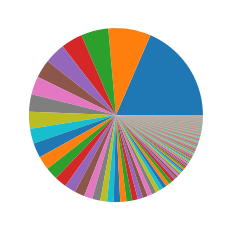

In [13]:
gold_pie = olympic[olympic['Medal'] == 'Gold'].Team.value_counts()

plt.pie(gold_pie)

In [14]:
gold_pie.head(30)

United States    2474
Soviet Union     1058
Germany           679
Italy             535
Great Britain     519
France            455
Sweden            451
Hungary           432
Canada            422
East Germany      369
Russia            366
Australia         342
China             308
Norway            299
Netherlands       277
Japan             247
South Korea       211
Finland           198
Denmark           168
Cuba              164
Romania           161
West Germany      155
Switzerland       144
India             138
Yugoslavia        130
Unified Team      123
Poland            117
Spain             108
Brazil            103
Austria            95
Name: Team, dtype: int64

In [15]:
gold_pie.sum()

13372

['China', 'Denmark', 'Denmark/Sweden', 'Netherlands', 'United States', 'Finland', 'Norway', 'Romania', 'Estonia', 'France', 'Taifun', 'Morocco', 'Spain', 'Egypt', 'Iran', 'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia', 'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey', 'Chile', 'Mexico', 'Soviet Union', 'Nicaragua', 'Hungary', 'Nigeria', 'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'United Arab Republic', 'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Thessalonki-1', 'Canada', 'Ireland', 'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan', 'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros', 'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Syria', 'Maldives', 'Ethiopia', 'United Arab Emirates', 'North Yemen', 'Indonesia', 'Philippines', 'Singapore', 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan', 'Unified Team', 'Japan', 'Japan-1', 'Congo (Brazzaville)', 'Switzerland', 'Brazil', 'West Germany', 'East Germany', 'Monaco', 'Fornebo', 'Israe

ValueError: 'label' must be of length 'x'

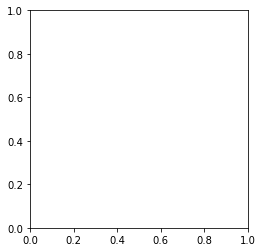

In [16]:
gold_pie = olympic[olympic['Medal'] == 'Gold'].Team.value_counts()

topic = olympic['Team'].unique()

labels = list(topic)

print(labels)

plt.pie(gold_pie, labels = labels, startangle = 90)

plt.show() 

# USA - Gold Medal count

In [47]:
usa = olympic[olympic['Medal'] == 'Gold'][olympic['Team'] == 'United States']

usa.Sport.value_counts().head(10)

<ipython-input-47-a138c967ad19>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  usa = olympic[olympic['Medal'] == 'Gold'][olympic['Team'] == 'United States']


Swimming      645
Athletics     537
Basketball    281
Rowing        160
Shooting      117
Football       66
Ice Hockey     56
Gymnastics     55
Wrestling      52
Boxing         50
Name: Sport, dtype: int64

# Country_Basketball - Gold Medal count

In [44]:
country = olympic[olympic['Medal'] == 'Gold'][olympic['Sport'] == 'Basketball']

country.Team.value_counts()

<ipython-input-44-50a38dfbdd6b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country = olympic[olympic['Medal'] == 'Gold'][olympic['Sport'] == 'Basketball']


United States    281
Soviet Union      48
Argentina         12
Yugoslavia        12
Unified Team      12
Name: Team, dtype: int64

# Country_Swimming - Gold Medal count

In [46]:
ct2 = olympic[olympic['Medal'] == 'Gold'][olympic['Sport'] == 'Swimming']

ct2.Team.value_counts().head()



<ipython-input-46-37953c845a72>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ct2 = olympic[olympic['Medal'] == 'Gold'][olympic['Sport'] == 'Swimming']


United States    645
Australia        118
East Germany      62
Hungary           36
Netherlands       30
Name: Team, dtype: int64

# Russia - Gold Medal count

In [52]:
rus = join[join['Medal'] == 'Gold'][join['region'] == 'Russia']

rus.Sport.value_counts().head(10)

Gymnastics              176
Ice Hockey              153
Athletics               124
Fencing                 101
Wrestling                97
Handball                 97
Volleyball               93
Cross Country Skiing     73
Basketball               60
Canoeing                 59
Name: Sport, dtype: int64

# VIE - Olympic

In [17]:
vie_olympic = olympic.join(noc.set_index('NOC'), on='NOC')[olympic['NOC'] == 'VIE']

In [18]:
vie_mean_hw = vie_olympic.groupby(['Sex']).mean()[['Height', 'Weight', 'Age']]

count_vie = olympic[olympic['NOC'] == 'VIE'].Sex.value_counts()

print(f'Mean H/W VIE-OLYMPIC: \n {vie_mean_hw}')

print(f'COUNT:\n {count_vie}')

Mean H/W VIE-OLYMPIC: 
          Height     Weight        Age
Sex                                  
F    161.463768  52.642857  21.716216
M    168.428571  62.038961  26.425000
COUNT:
 M    80
F    74
Name: Sex, dtype: int64
